In [30]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #importing and defining train and test data

In [31]:
#decode the reviews back into english words
word_index = imdb.get_word_index() #dictionnary mapping words to an integer index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) #reverses the dictionnary above, i.e. mapping integers to words
def decoded(x): #decoding function for the review x
    print(''.join([reverse_word_index.get(i-3,'?') for i in train_data[x]])) #decodes the review, i-3 not entirely clear!
    return

In [44]:
#Preparing our data for a neural network, i.e. convert into tensors
import numpy as np
def vectorize_sequences(sequences, dimension=10000): #not entirely clear!
    results = np.zeros((len(sequences), dimension)) #all zero matrix of shape(len(sequences),dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. #set specific indices of results[i] to 1
    return results

#vectorize labels
x_train = vectorize_sequences(train_data) #vectorized training data
x_test = vectorize_sequences(test_data) #vectorized test data

#vectorize labels
y_train = np.asarray(train_labels).astype('float32') #vectorized training labels
y_test = np.asarray(test_labels).astype('float32') #“ectorized test labels

In [52]:
#defining the model
#not entirely clear, but will be explained later
from tensorflow.keras import models #without writing tensorflow. an error occurs!
from tensorflow.keras import layers #without writing tensorflow. an error occurs!

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [53]:
#compiling the model
#no idea about the rmsprop optimizer and what the metrics is about
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])

In [61]:
#setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [82]:
#training the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 159us/sample - loss: 1.8240e-08 - acc: 1.0000 - val_loss: 2.2487 - val_acc: 0.8564
Epoch 2/20
15000/15000 [==============================] - 2s 162us/sample - loss: 1.5403e-08 - acc: 1.0000 - val_loss: 2.2715 - val_acc: 0.8557
Epoch 3/20
15000/15000 [==============================] - 2s 145us/sample - loss: 1.3294e-08 - acc: 1.0000 - val_loss: 2.2893 - val_acc: 0.8562
Epoch 4/20
15000/15000 [==============================] - 2s 147us/sample - loss: 1.1679e-08 - acc: 1.0000 - val_loss: 2.3080 - val_acc: 0.8559
Epoch 5/20
15000/15000 [==============================] - 2s 147us/sample - loss: 1.0412e-08 - acc: 1.0000 - val_loss: 2.3230 - val_acc: 0.8559
Epoch 6/20
15000/15000 [==============================] - 2s 147us/sample - loss: 9.3579e-09 - acc: 1.0000 - val_loss: 2.3358 - val_acc: 0.8566
Epoch 7/20
15000/15000 [==============================] - 2s 146us/sample - loss: 8.49

In [72]:
history_dict = history.history
history_dict.keys() #not entirely clear

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

range(1, 21)


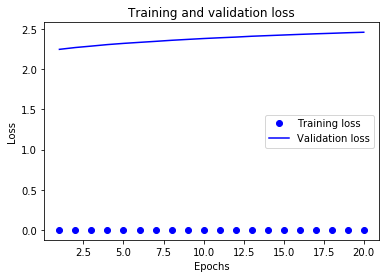

In [97]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)
print(epochs)

plt.plot(epochs, loss_values, 'bo', label='Training loss') #bo means blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') #b means blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

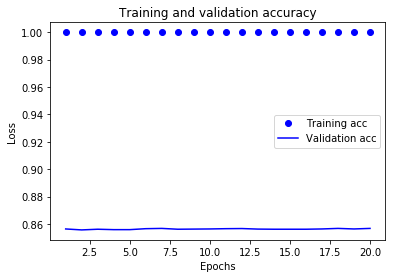

In [94]:
#Plotting the training and validation accuracy
plt.clf() #clearing the figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
